# Panel Data Analysis

## Goal
- **Background**
    - Basic Assumption
    - BLUE
- **Basic Model**
- **Statistical Test**
    - Prove
    - Meaning
    - Application
- **Advanced Model**
    - Equation
    - Meaning
    - Related Statistical Test
    - Situation

## Background

### Basic Assumption
- 0 Linearity
- 1 $E(\epsilon_{it}) = 0$
    - 모든 시점 오차항의 기댓값이 0
- 2 $var(\epsilon_{it}) = \sigma^2$
    - 모든 패널 개체에 대해 모든 시점에서 오차항의 분산이 $\sigma^2$
    - 동분산성
- 3 $cov(\epsilon_{it}, \epsilon_{js}) = 0$
    - 모든 시점 오차항의 기댓값이 0
    - 패널 개체의 오차항은 서로 상관관계가 없어야 함 
    - 다른 시점의 오차항 사이에도 상관관계가 존재하지 않아야 함
        - 동시적 상관
            - 주어진 시점에서 패널 개체간 상관관계
        - 자기상관
            - 한 패널 그룹 내에서 서로 다른 시점간의 상관
- 4 $cov(x_{it},\epsilon_{it}) = 0$
    - 모든 시점 오차항의 기댓값이 0
    - 설명변수의 외생성

### BLUE
- **Best Linear Unbiased Estiomator**
    - 모든 시점 오차항의 공분산 행렬이 고정된 분산의 대각행렬
    - $\begin{bmatrix} \sigma^2 & 0 & 0 & 0 & 0 \\ 0 & \sigma^2 & 0 & 0 & 0 \\ \dots \\ 0 & 0 & 0 & 0 & \sigma^2\end{bmatrix}$
    - 최소자승선은 데이터들 사이의 거리가 최소가 되도록 하는 식
    - 단순선형회귀 모형에서 모든 값은 최소자승선으로 회귀할 것이라고 추정하기 때문에 추정치라고 부르는 것
        - 실제 데이터와 추정치간의 차이를 잔차라고 함
            - $\epsilon_i = y_i - \hat y_i$
            - SSE(Sum of Squares for Error)를 통해 잔차 확인
    - 여기서 오차 변수가 정규분포를 따르면 MVUE(Minimum Variance Unbiased Estimator)가 된다.


- **LS-good**
    - **good estimator**
        - Unbiased
        - Consistency
        - Efficiency
    - LS가 Gauss-Markov Condition 하에서 **BLUE**이다
        - B : Best
            - no other esitmator that is more eifficient, consistence
        - L : Linear 
        - U : Unbiased
        - E : Estimator

## Basic Model

### Pooled OLS
- Pooled OLS is a Basic Model for Panel Data
- Def **Panel Data**
    - Panel Data is cross-sectional time series data
        - cross-sectional
            - collection of many subjects at one point
        - time-series
- **Equation**
    - $y_{it} = \alpha + \beta x_{it} + \epsilon_{it}$
        - Terms
            - $n$ : # of panel object  , $i = 1, \cdots, n$
            - $T_i$ : time period of object i 
                - if $T_i = T \rightarrow$ balanced panel
                    - $N$ : all obeserved object
                - Def classification of panel based on balance                        
                    - balanced panel : $n \times T$
                        - Time period of all objects are same
                    - unbalanced panel : $\sum T_i$
                        - Time period of all objects are **not** same
                        - Useally our practical data is unbalanced panel data
                        - we can derive result with a little bias for unbalanced panel by using Wooldridge method
        - Meaning
            - Sharing $\alpha, \beta$
                - Do not reflect individual panel's property
- Situation
    - All Assumption holds
        - If not
            - 공적분 기법이 검정력이 낮다는 문제
            - 검정력이 높으면 귀무가설이 너무 빈번하게 기각됨
            - stationarity에서 random walk로 변환 이후 변화가 생기는 중
            - random walk의 경우 유한한 분산을 가지지 않기 때문에 일관성 있는 회귀계수 추정 불가능
            - 따라서 우선 안전성 검정을 해야 함

- LR 검정통계량
    - Likelihood Ratio
    - Equation
        - $LR = -2(ln L_R - ln L_{UR}) \sim \chi^2_{df}$
            - $L_R$  : 제약이 가해진 모델
            - $L_{UR}$ : 제약이 가해지지 않은 모델
    - 비제약 모형은 오차항의 분산이 패널 개체별로 서로 다르다고 가정
    - 제약 모향은 오차항의 분산이 패널 그룹에 따라 다르지 않다(같다)고 가정
    - 로그 우도 함수를 통해 검정 통계량 계산
    - 검정통계량은 카이제곱 분포를 따름
- Understanding Likelihood
    - Random variable is $\epsilon$ 
        - we assume $\epsilon \sim N$ 
            - $\epsilon \sim N \rightarrow y \sim N$ 
            - $y \sim N \rightarrow likelihood \sim N$ 
            - Normal distribution PDF has exp form
                - Log transformation makes calculation easier
                    - By using First Order Tayler approximation, we can derive LR
                        - This is relared with $\chi^2$

In [73]:
import scipy as sp
%matplotlib inline

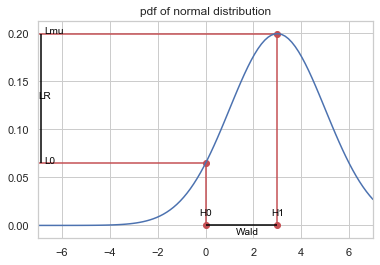

In [74]:
mu = 3
lr = sp.stats.norm(mu, 2)
xx = np.linspace(-7, 7, 100)
plt.plot(xx, lr.pdf(xx))
plt.scatter(0, lr.pdf(0), c="r")
plt.scatter(mu, lr.pdf(mu), c="r")
plt.hlines(lr.pdf(0), -7, 0, colors = "r")
plt.hlines(lr.pdf(mu), -7, mu, colors = "r")

plt.title("pdf of normal distribution")
plt.vlines(mu, 0, lr.pdf(mu), colors = "r")
plt.vlines(0, 0, lr.pdf(0), colors = "r")
plt.vlines(-7+0.1, lr.pdf(0), lr.pdf(mu), colors = "black")
plt.hlines(0, 0, mu, colors = "black")
plt.scatter(0,0, c = "r")
plt.scatter(mu,0, c = "r")
plt.text(-0.25, 0.01, 'H0', c = "Black")
plt.text(mu -0.25, 0.01, 'H1', c = "Black")
plt.text(mu  / 2 - 0.25, -.01, 'Wald', c = "Black")
plt.text(-7 + 0.25,  lr.pdf(0), "L0", c = "Black")
plt.text(-7 + 0.25,  lr.pdf(mu), "Lmu", c = "Black")
plt.text(-7,  (lr.pdf(0) + lr.pdf(mu)) / 2, "LR", c = "Black")
plt.xlim(-7, 7)
plt.show()

## 이분산성 가정(기본 가정 2 확장)
- 패널 데이터는 2-4 가정이 위배될 수 있음
    - 따라서 오차항에 이분산성이 존재하는 경우(고정된 분산의 대각행렬이 아닌 경우)
        - GLS
            - generalized least squares
            - 오차항의 이분산 구조나 자기상관 구조를 활용해 이를 상쇄하는 함수를 활용하는 최소제곱방법
        - sigma 추정치를 N이 아닌 N - k 값 사용
            - k : 추정해야 할 모수 개수
        - 동분산성 가정
        - 자기상관 존재 x
    - 오차항에서 이분산성 가정
        - $\Omega \begin{bmatrix} \sigma_1^2 & 0 & \cdots & 0 \\ 0 & \sigma_2^2 & \cdots & 0 \\ \dots \\ 0 & 0 &  \cdots & \sigma_n^2\end{bmatrix}$
        - 패널간 이분산성 가정
        - 자기상관 없음
- LR

## 상관관계 가정(기본 가정 3 확장)
- $\epsilon_{i,j}$에 자기상관이나 동시적 상관이 존재할 수 있음
    - 자기상관
        - $cov(\epsilon_{it}, \epsilon_{is}) \ne 0$
        - $\epsilon_{it} = \rho \epsilon_{it-1} + v_{it}$
            - 자기상관을 넣었을 때는 이전과 다른 결과가 나올 수 있다
                - 즉 자기상관을 넣지 않았을 때는 유의하다고 나온 변수가, 자기상관을 넣었을 때는 유의하다고 나오는 것이다
            - 로그우도 결과는 이전과 같다
        - Wooldridge 검정을 통해 자기상관 검정을 할 수 있다. 
    - 동시적 상관
        - $corr(\epsilon_{it}, \epsilon_{jt}) \ne 0$
        - $\begin{bmatrix} \sigma_1^2 & \sigma_{21} & \cdots & \sigma_{n1} \\ \sigma_{12} & \sigma_2^2 & \cdots & \sigma_{n2} \\ \dots \\ \sigma_{1n} & \sigma_{2n} & \cdots & \sigma_n^2\end{bmatrix}$

## 사후 분석(Post-hoc)
- Def
    - Wald 검사
    - LR 검정
        - 비제약 모형을 추정한 후 그 결과를 저장
    - 

## Tips for Data Analysis
- Log Transformation
    - 양수이면서 분포가 치우친 형태이면, 로그변환을 했을 때 CLM 가정 더 만족함
        - 왜도가 -1~1 범위를 벗어날 때 사용
    - 왜곡이 심하거나, 변환 이후 분산이 크게 감소하면 변환해줌
        - outlier에 덜 민감해짐
        - 거시경제에서 나타나는 이분산성 문제 완화
    - 2 이상의 왜도 개선이 보인다면 로그변환
    - 첨도가 정규분포에서 멀어지면 의미 없음
    - 변화율이나 변화의 탄력성 확인할 수 있음  